In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("Amazon Sale Report.csv", on_bad_lines="skip", engine="python")
df.head() 

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113584 entries, 0 to 113583
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               113584 non-null  int64  
 1   Order ID            113584 non-null  object 
 2   Date                113584 non-null  object 
 3   Status              113584 non-null  object 
 4   Fulfilment          113583 non-null  object 
 5   Sales Channel       113583 non-null  object 
 6   ship-service-level  113583 non-null  object 
 7   Category            113583 non-null  object 
 8   Size                113583 non-null  object 
 9   Courier Status      113583 non-null  object 
 10  Qty                 113583 non-null  float64
 11  currency            106696 non-null  object 
 12  Amount              106696 non-null  float64
 13  ship-city           113554 non-null  object 
 14  ship-state          113554 non-null  object 
 15  ship-postal-code    113554 non-nul

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
index,113584.0,NaN,NaN,NaN,56790.080346,32789.682207,0.0,28394.75,56790.5,85186.25,113582.0
Order ID,113584,105847,171-5057375-2831560,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,113584,81,05-03-2022,2085,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Status,113584,13,Shipped,67673,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fulfilment,113583,2,Amazon,78066,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sales Channel,113583,2,Amazon.in,113480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ship-service-level,113583,2,Expedited,77133,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,113583,9,T-shirt,44723,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,113583,11,M,19638,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Courier Status,113583,4,Shipped,96293,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Top 10 Orders by Sales Amount
top_orders = df.sort_values(by='Amount', ascending=False).head(10)

print("\nTop 10 Orders by Sales Amount:")
print(top_orders[['Order ID', 'Amount', 'Category']])



Top 10 Orders by Sales Amount:
                  Order ID   Amount Category
42040  402-5239558-4281957  5584.00  T-shirt
11161  403-4106553-1691525  5495.00  T-shirt
24495  407-3483041-9133135  4235.72  T-shirt
89151  406-7195963-2374765  3036.00  T-shirt
28815  408-9885439-6698733  2864.00  T-shirt
39945  408-3363121-6123562  2860.00  Blazzer
79900  405-6877720-7865168  2796.00    Shirt
63975  408-9361250-7029128  2698.00  T-shirt
75761  402-9141667-1791537  2676.00  T-shirt
54606  171-9419863-7830701  2655.00  Blazzer


In [ ]:
# Bottom 10 Orders by Sales Amount
bottom_orders = df.sort_values(by='Amount', ascending=True).head(10)

print("\nBottom 10 Orders by Sales Amount:")
print(bottom_orders[['Order ID', 'Amount', 'Category']])



Bottom 10 Orders by Sales Amount:
                   Order ID  Amount  Category
58398   408-5342580-3430751     0.0   T-shirt
14063   408-0284206-6409905     0.0  Trousers
14064   408-6871057-1314754     0.0     Shirt
101817  408-0667003-3413103     0.0   T-shirt
40343   408-2604546-9038738     0.0   T-shirt
43410   408-1246506-5670700     0.0   T-shirt
43405   408-7495911-5837107     0.0     Shirt
71052   408-1783634-4457962     0.0     Shirt
91318   408-7821819-6780345     0.0   T-shirt
90038   408-8684334-1417158     0.0     Shirt


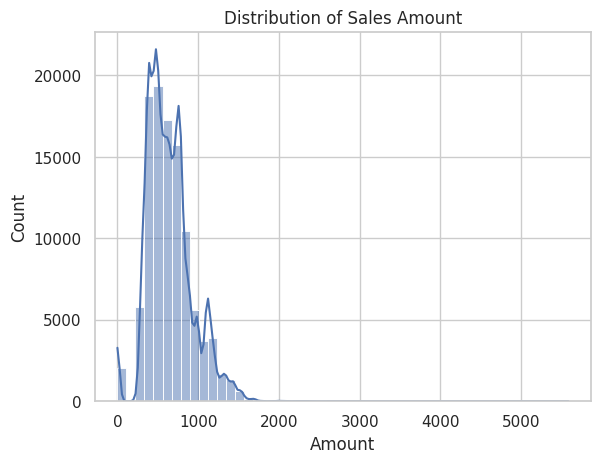

In [ ]:
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution of Sales Amount')
plt.show()

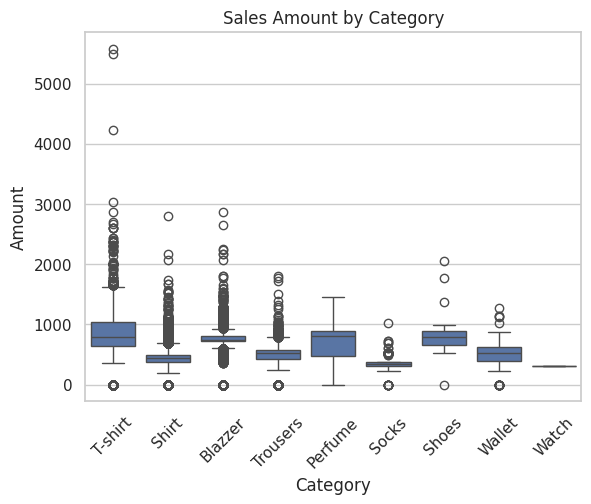

In [ ]:
sns.boxplot(x='Category', y='Amount', data=df)
plt.xticks(rotation=45)
plt.title('Sales Amount by Category')
plt.show()

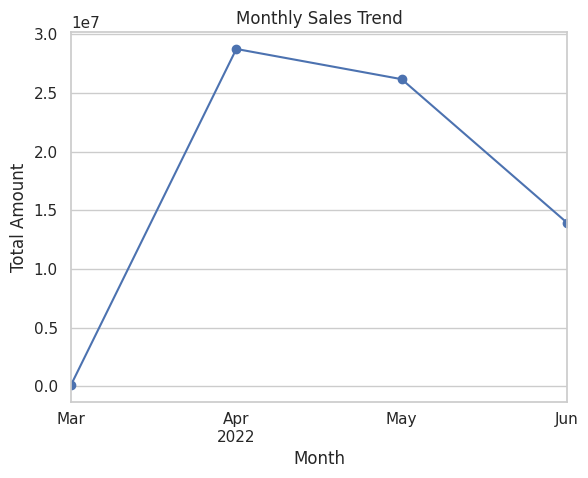

In [ ]:
df['Month'] = df['Date'].dt.to_period('M')
monthly = df.groupby('Month')['Amount'].sum()

monthly.plot(marker='o')
plt.title('Monthly Sales Trend')
plt.ylabel('Total Amount')
plt.show()

/tmp/ipython-input-1037492771.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-1037492771.py:3: UserWarning: 
The palette list has fewer values (4) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


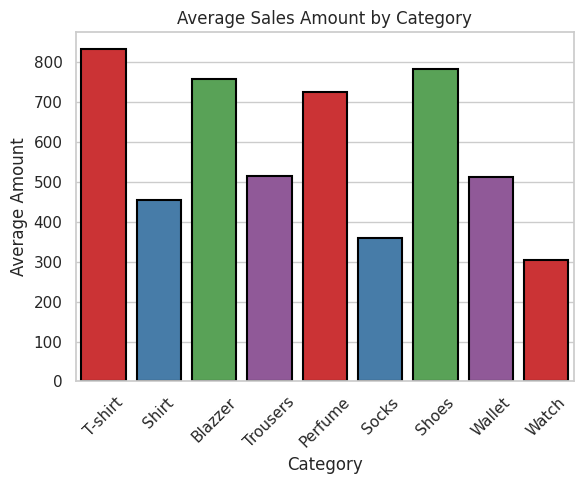

In [ ]:
plt.figure(figsize=(6,5))
clr = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3']  # add more colors if many categories
sns.barplot(
    x='Category',
    y='Amount',
    data=df,
    estimator='mean',
    errorbar=None,
    palette=clr,
    edgecolor='black',
    linewidth=1.5
)
plt.title('Average Sales Amount by Category')
plt.xticks(rotation=45)
plt.ylabel('Average Amount')
plt.xlabel('Category')
plt.tight_layout()
plt.savefig('avg_amount_by_category.png')
plt.show()

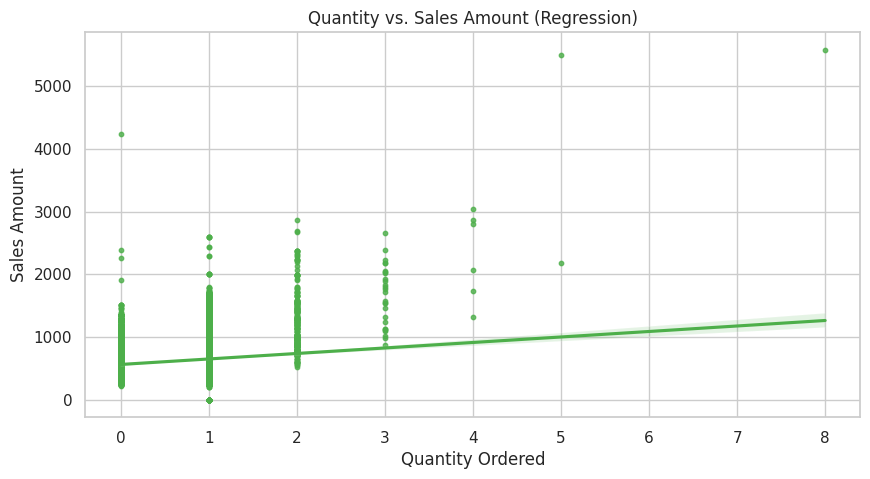

In [ ]:
plt.figure(figsize=(10,5))
sns.regplot(
    x='Qty',
    y='Amount',
    data=df,
    scatter_kws={"s": 10},
    color='#4daf4a'
)
plt.title('Quantity vs. Sales Amount (Regression)')
plt.xlabel('Quantity Ordered')
plt.ylabel('Sales Amount')
plt.savefig('qty_vs_amount_regression.png')
plt.show()

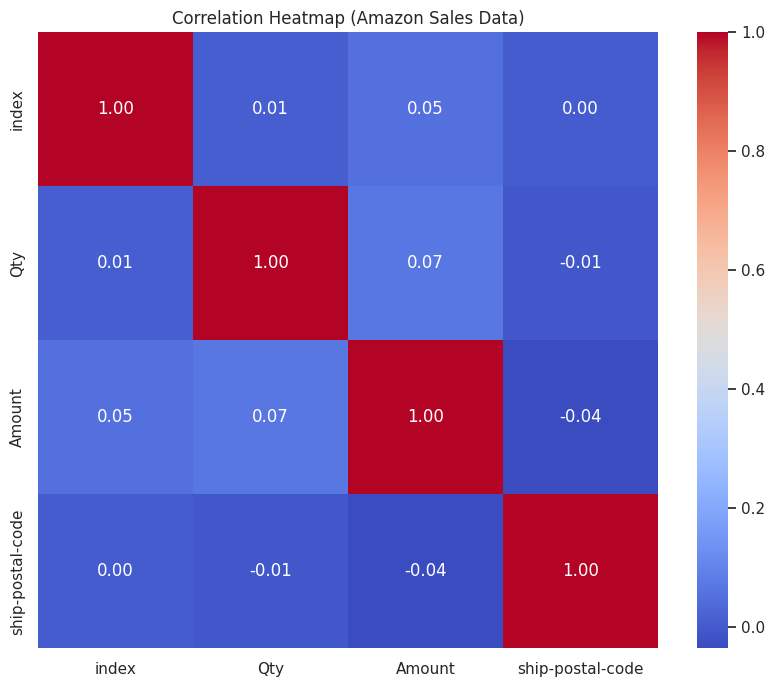

In [ ]:
# Select only numerical columns and drop empty ones
numerical_df = df.select_dtypes(include=np.number).dropna(axis=1, how='all')

# Compute correlation matrix
corr = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Amazon Sales Data)")
plt.show()

/tmp/ipython-input-1331900705.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category',
/tmp/ipython-input-1331900705.py:7: UserWarning: 
The palette list has fewer values (4) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='Category',


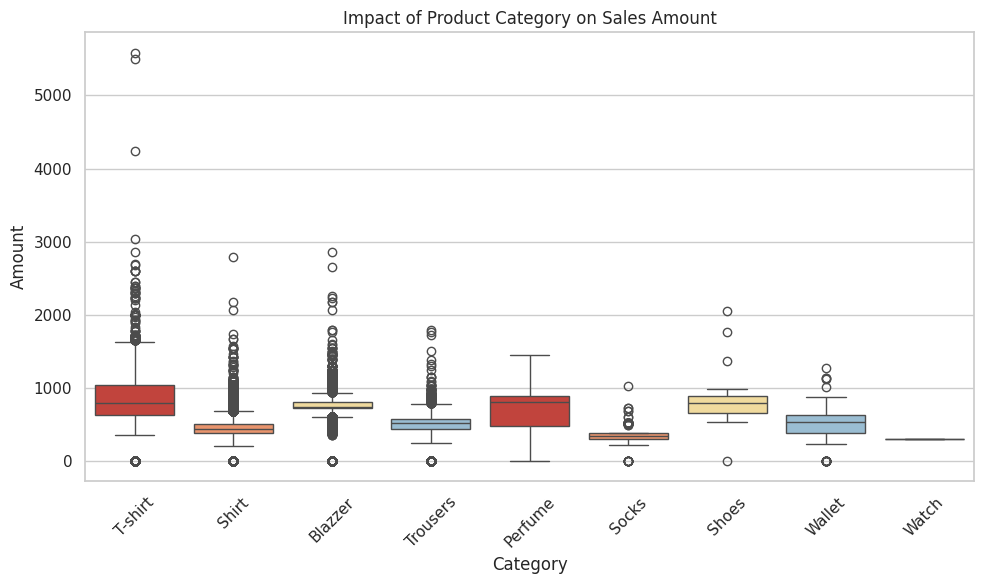

In [ ]:
# 5. Boxplot of BMI Category vs Total Cost
plt.figure(figsize=(10, 6))

# Define a custom palette
category_palette = ['#d73027', '#fc8d59', '#fee090', '#91bfdb']

# Boxplot: Category vs Amount
sns.boxplot(x='Category',
            y='Amount',
            data=df,
            palette=category_palette)

plt.title('Impact of Product Category on Sales Amount')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.tight_layout()
plt.savefig('category_vs_amount.png')
plt.show()

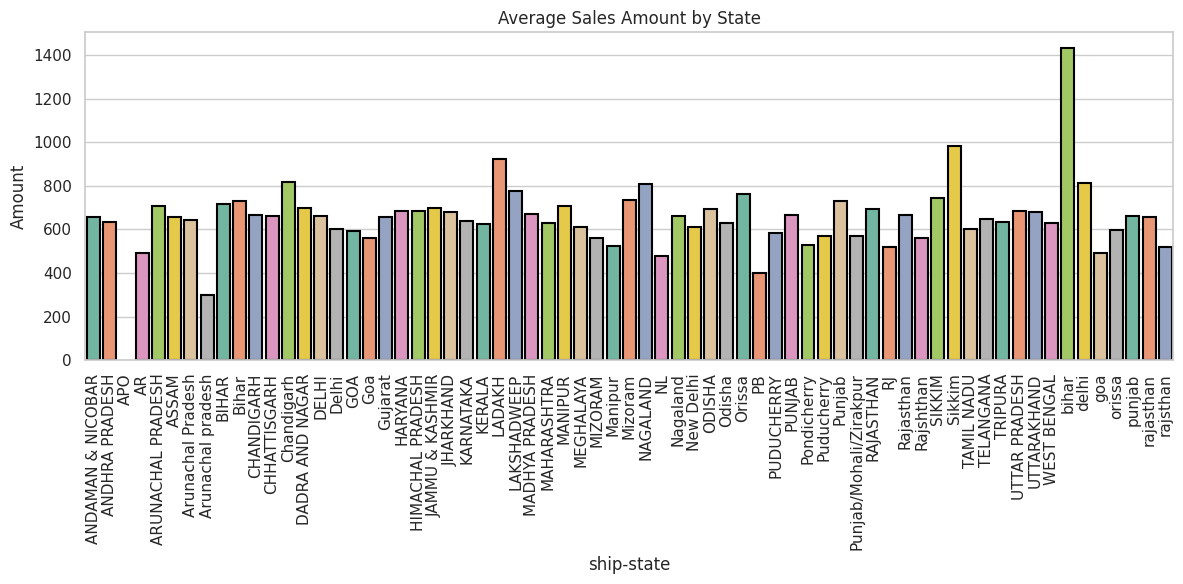

In [ ]:
# 6. Barplot of Average Total Cost by Hospital Region
plt.figure(figsize=(12, 6))

# Calculate average sales amount by ship-state
state_avg = df.groupby('ship-state')['Amount'].mean().reset_index()

# Barplot
sns.barplot(x='ship-state',
            y='Amount',
            data=state_avg,
            palette="Set2",
            hue='ship-state',
            legend=False,
            edgecolor='black',
            linewidth=1.5)

plt.title('Average Sales Amount by State')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.savefig('state_avg_sales.png')
plt.show()

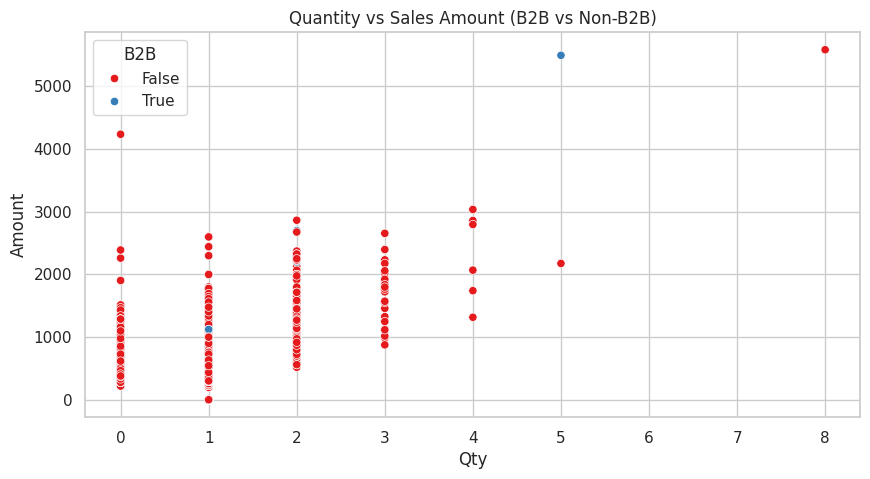

In [ ]:
plt.figure(figsize=(10, 5))

sns.scatterplot(x='Qty',
                y='Amount',
                hue='B2B',
                data=df,
                palette='Set1')

plt.title('Quantity vs Sales Amount (B2B vs Non-B2B)')
plt.savefig('qty_vs_amount.png')
plt.show()

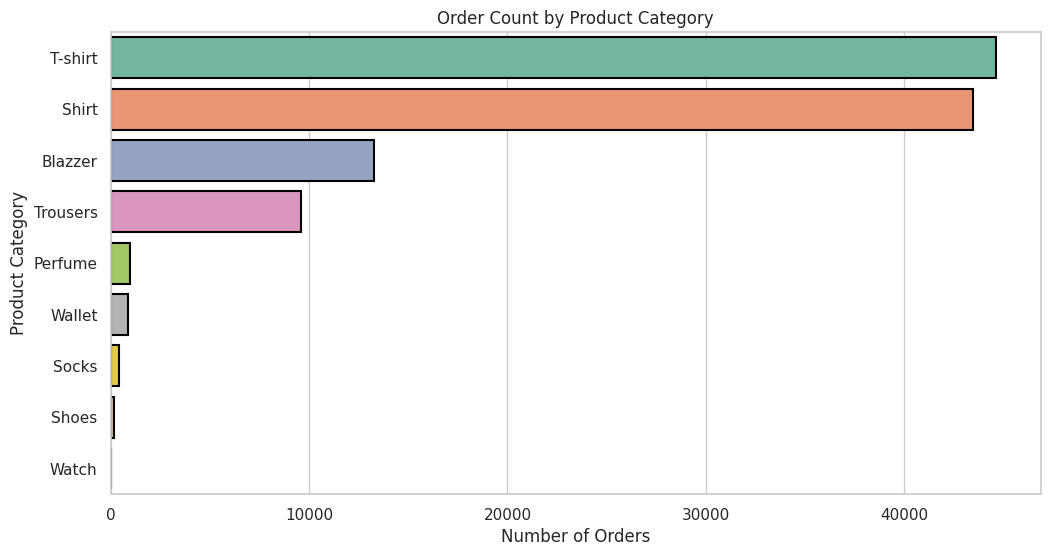

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.countplot(y='Category',
              data=df,
              palette='Set2',
              hue='Category',
              legend=False,
              edgecolor='black',
              linewidth=1.5,
              order=df['Category'].value_counts().index)

plt.title('Order Count by Product Category')
plt.xlabel('Number of Orders')
plt.ylabel('Product Category')
plt.savefig('order_count_by_category.png')
plt.show()


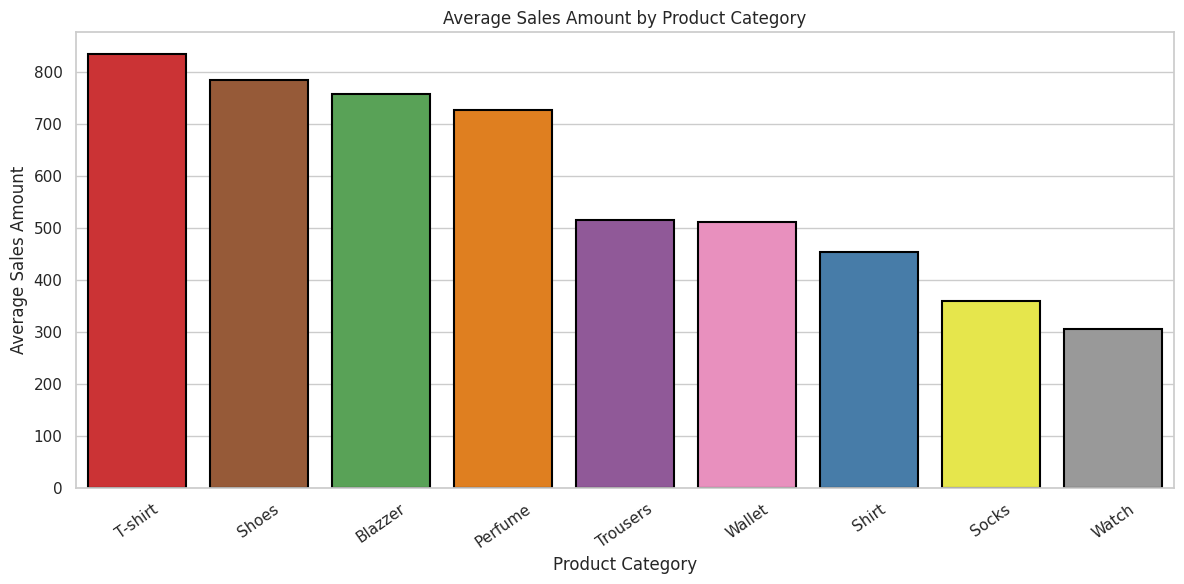

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.barplot(x='Category',
            y='Amount',
            data=df,
            errorbar=None,
            palette='Set1',
            hue='Category',
            legend=False,
            edgecolor='black',
            linewidth=1.5,
            order=df.groupby('Category')['Amount'].mean().sort_values(ascending=False).index)

plt.title('Average Sales Amount by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Sales Amount')
plt.xticks(rotation=35)
plt.tight_layout()
plt.savefig('avg_sales_amount_by_category.png')
plt.show()


/tmp/ipython-input-3819994022.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category',


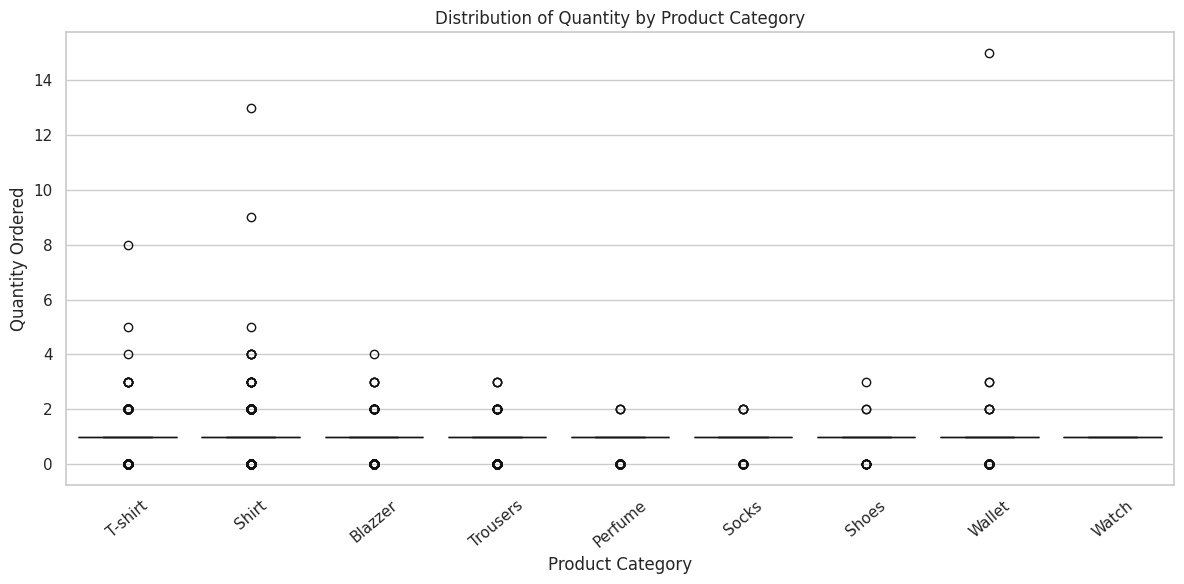

In [ ]:
plt.figure(figsize=(12, 6))

sns.boxplot(x='Category',
            y='Qty',
            data=df,
            palette='cubehelix')

plt.title('Distribution of Quantity by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=40)
plt.tight_layout()
plt.savefig('qty_distribution_by_category.png')
plt.show()

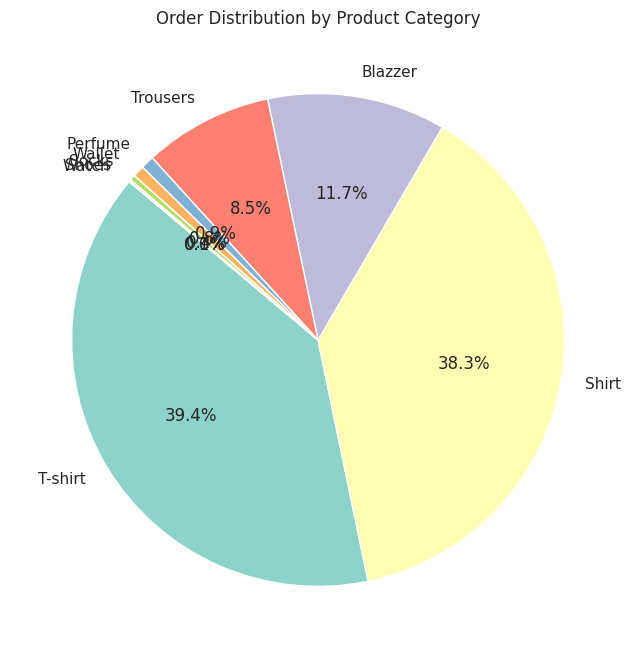

In [53]:
category_counts = df['Category'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(category_counts,
        labels=category_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Set3.colors)
plt.title('Order Distribution by Product Category')
plt.show()

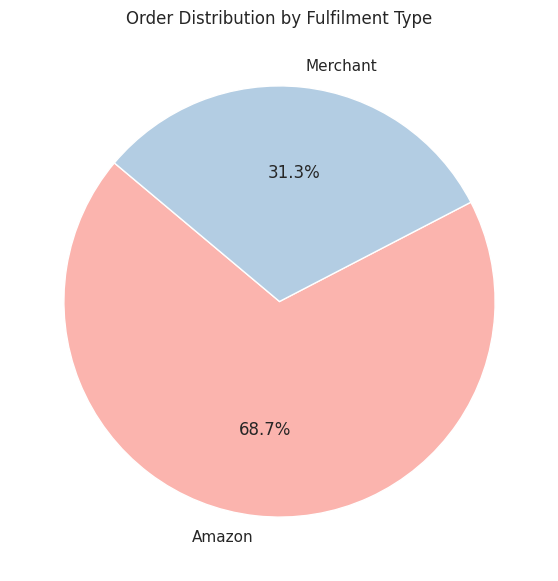

In [54]:
fulfilment_counts = df['Fulfilment'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(fulfilment_counts,
        labels=fulfilment_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Pastel1.colors)
plt.title('Order Distribution by Fulfilment Type')
plt.show()

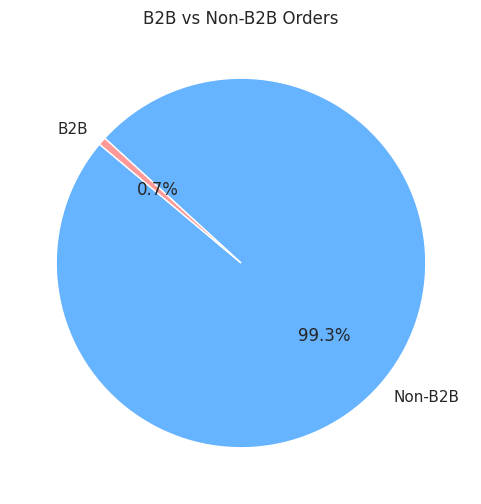

In [55]:
b2b_counts = df['B2B'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(b2b_counts,
        labels=['Non-B2B', 'B2B'],
        autopct='%1.1f%%',
        startangle=140,
        colors=['#66b3ff', '#ff9999'])
plt.title('B2B vs Non-B2B Orders')
plt.show()
